In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.DataFrame(pd.read_excel('DATA _FILE _334.xlsx')) 
df.head()

,Part ID,Planning Leadtime,Order Policy,Order Point,Safety Stock Qty,Fixed Order Qty,Days Of Supply,Minimum Order Qty,Maximum Order Qty,Multiple Order Qty,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,Annual 1,Annual 2,ANNUAL DEMAND
0,1.548500e+05,14,P,NaN,0.0,NaN,30.0,50.0,NaN,NaN,...,7.0,7.0,6.0,6.0,6.0,6.0,6.0,74.0,74.0,74.0
1,3.684600e+06,35,D,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,10.0,4.0,10.0,11.0,11.0,11.0,11.0,118.0,118.0,118.0
2,3.270501e+09,56,P,NaN,NaN,NaN,30.0,25.0,NaN,25.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,57.0,57.0,57.0
3,3.270820e+09,35,P,NaN,NaN,NaN,60.0,NaN,NaN,NaN,...,5.0,4.0,5.0,6.0,5.0,5.0,5.0,57.0,58.0,58.0
4,3.275500e+09,49,P,NaN,NaN,NaN,28.0,12.0,NaN,1.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,52.0,52.0,52.0


In [22]:
# Filter by descending
df = df.sort_values(by='ANNUAL DEMAND', ascending=False)

# Calculate the number of parts in each category
num_parts_A = int(689 * 0.20)
num_parts_B = int(689* 0.30)
num_parts_C = int(689 - num_parts_A - num_parts_B)

# Calculate the number of unique part IDs in each category
count_A = df.head(num_parts_A)['Part ID'].nunique()
count_B = df[num_parts_A:num_parts_A + num_parts_B]['Part ID'].nunique()
count_C = df.tail(num_parts_C)['Part ID'].nunique()

# Print the count of unique part IDs for each category
print("Count of part IDs for A category (top 20%):", count_A)
print("Count of part IDs for B category (next 30%):", count_B)
print("Count of part IDs for C category (last 50%):", count_C)


Count of part IDs for A category (top 20%): 137
Count of part IDs for B category (next 30%): 206
Count of part IDs for C category (last 50%): 346


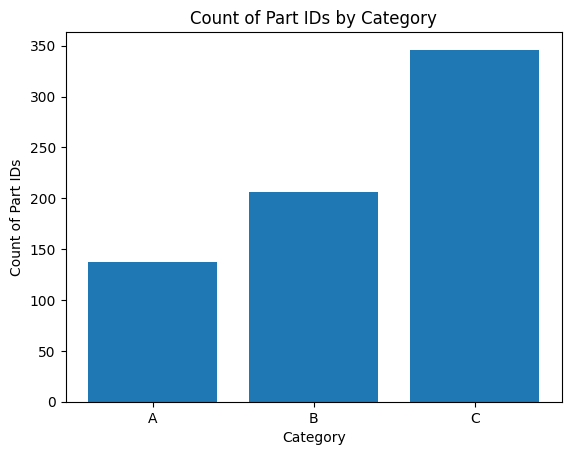

In [23]:
import matplotlib.pyplot as plt


categories = ['A', 'B', 'C']
counts = [count_A, count_B, count_C]

plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count of Part IDs')
plt.title('Count of Part IDs by Category')
plt.show()
